In [18]:
import numpy as np
import pandas as pd
import os
import warnings
from matplotlib import pyplot as plt
import seaborn as sns
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
os.getcwd()

'C:\\Users\\Vader\\Documents\\Python AZ programming'

In [4]:
os.chdir('C://Users/Vader/Documents/Python AZ programming/L6')

In [5]:
movie=pd.read_csv('Movie-Ratings.csv')

In [6]:
movie.head()

,Film,Genre,Rotten Tomatoes Ratings %,Audience Ratings %,Budget (million $),Year of release
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


In [20]:
movie.columns=['Films','Genre','CriticRating','AudienceRating','BudgetMillions','Year']

In [21]:
movie.head()

,Films,Genre,CriticRating,AudienceRating,BudgetMillions,Year
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


In [22]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
Films             559 non-null category
Genre             559 non-null category
CriticRating      559 non-null int64
AudienceRating    559 non-null int64
BudgetMillions    559 non-null int64
Year              559 non-null category
dtypes: category(3), int64(3)
memory usage: 40.3 KB


In [23]:
movie.describe()

,CriticRating,AudienceRating,BudgetMillions
count,559.000000,559.000000,559.000000
mean,47.309481,58.744186,50.236136
std,26.413091,16.826887,48.731817
min,0.000000,0.000000,0.000000
25%,25.000000,47.000000,20.000000
50%,46.000000,58.000000,35.000000
75%,70.000000,72.000000,65.000000
max,97.000000,96.000000,300.000000


In [24]:
movie.Films=movie.Films.astype('category')
movie.Genre=movie.Genre.astype('category')
movie.Year=movie.Year.astype('category')

In [25]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
Films             559 non-null category
Genre             559 non-null category
CriticRating      559 non-null int64
AudienceRating    559 non-null int64
BudgetMillions    559 non-null int64
Year              559 non-null category
dtypes: category(3), int64(3)
memory usage: 40.3 KB


In [26]:
movie.describe()

,CriticRating,AudienceRating,BudgetMillions
count,559.000000,559.000000,559.000000
mean,47.309481,58.744186,50.236136
std,26.413091,16.826887,48.731817
min,0.000000,0.000000,0.000000
25%,25.000000,47.000000,20.000000
50%,46.000000,58.000000,35.000000
75%,70.000000,72.000000,65.000000
max,97.000000,96.000000,300.000000


Joint plots

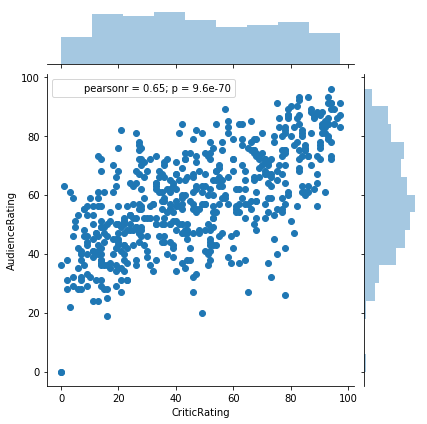

In [27]:
j=sns.jointplot(data=movie, x='CriticRating', y='AudienceRating')

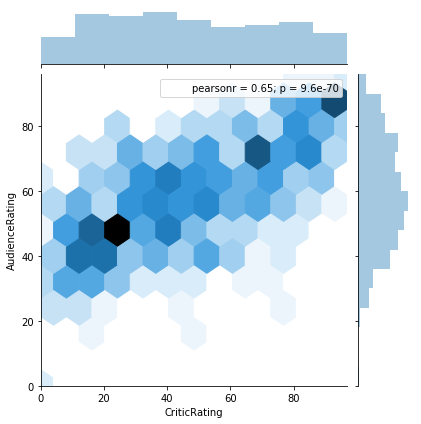

In [28]:
j=sns.jointplot(data=movie, x='CriticRating', y='AudienceRating', kind='hex')

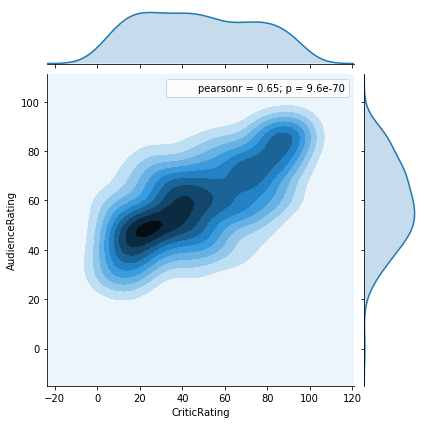

In [31]:
j2=sns.jointplot(data=movie, x='CriticRating', y='AudienceRating', kind='kde')

Histograms

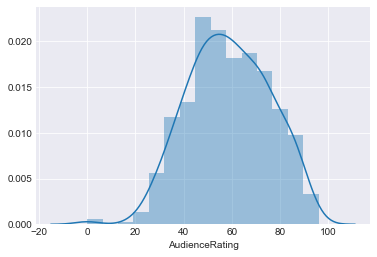

In [37]:
m1=sns.distplot(movie.AudienceRating, bins=15)

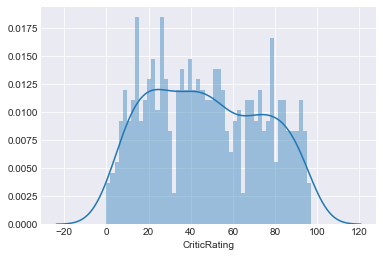

In [38]:
m2=sns.distplot(movie.CriticRating, bins=50)

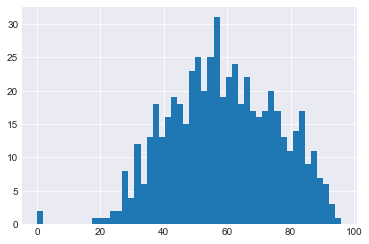

In [36]:
sns.set_style("darkgrid")
n1=plt.hist(movie.AudienceRating, bins=50)

Stacked histograms

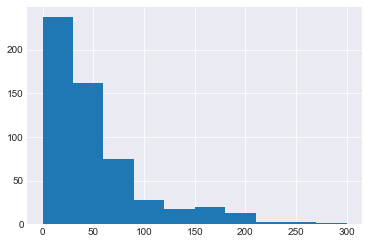

In [40]:
#Histograms
plt.hist(movie.BudgetMillions)
plt.show()

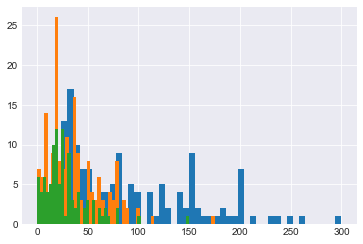

In [44]:
#Stacking hists one over another 
plt.hist(movie[movie.Genre=='Action'].BudgetMillions, bins=50)
plt.hist(movie[movie.Genre=='Comedy'].BudgetMillions, bins=50)
plt.hist(movie[movie.Genre=='Drama'].BudgetMillions, bins=50)
plt.show()

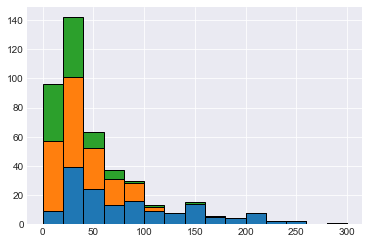

In [59]:
##Stacked plot
plt.hist([movie[movie.Genre=='Action'].BudgetMillions,\
         movie[movie.Genre=='Comedy'].BudgetMillions,\
         movie[movie.Genre=='Drama'].BudgetMillions], bins=15, stacked=True, ec='black')
plt.show()

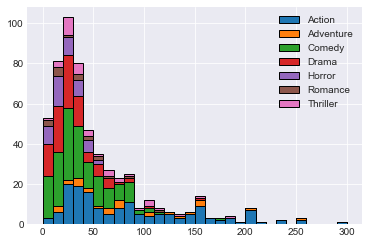

In [58]:
list1=list()
mylabels=list()
for gen in movie.Genre.cat.categories:
    list1.append(movie[movie.Genre == gen].BudgetMillions)
    mylabels.append(gen)
h = plt.hist(list1, bins=30, stacked=True, label=mylabels, rwidth=1, ec='black')
plt.legend()
plt.show()

Creating KDE plots

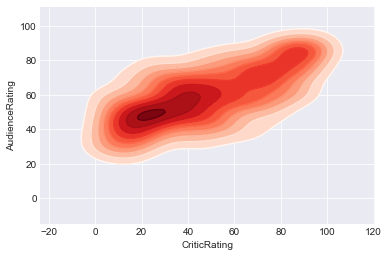

In [63]:
k1=sns.kdeplot(movie.CriticRating, movie.AudienceRating, shade=True, shade_lowest=False,\
              cmap='Reds')

## Sharpening the kde plot - create another kde with just the outlines
k1=sns.kdeplot(movie.CriticRating, movie.AudienceRating, shade=False, cmap='Reds')

Subplots and how to use them

(-20, 160)

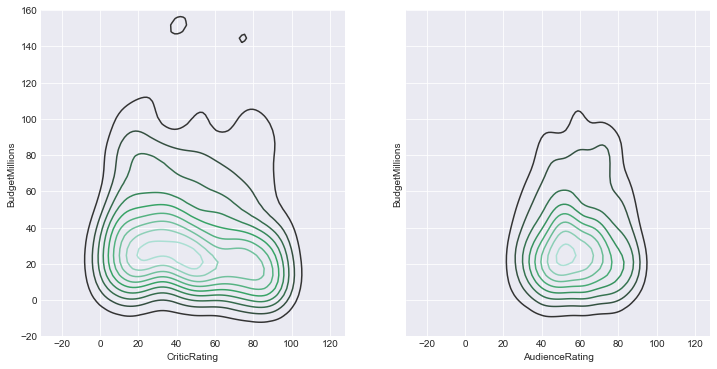

In [77]:
f, axes = plt.subplots(1,2, figsize=(12,6), sharex=True, sharey=True)
k1=sns.kdeplot(movie.CriticRating, movie.BudgetMillions, shade=False, ax=axes[0])
k2=sns.kdeplot(movie.AudienceRating, movie.BudgetMillions, shade=False, ax=axes[1])
k2.set_ylim(-20,160)

Creating violin plots

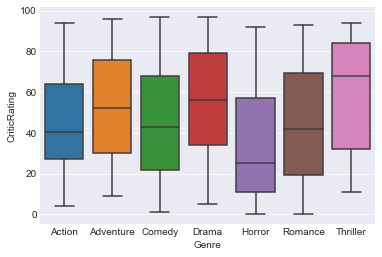

In [79]:
w = sns.boxplot(data=movie, x='Genre', y='CriticRating')

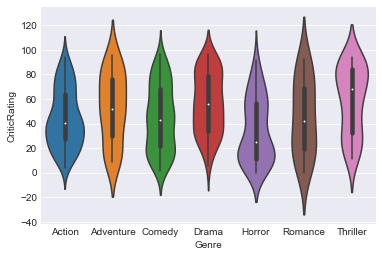

In [80]:
z=sns.violinplot(data=movie, x='Genre', y='CriticRating')

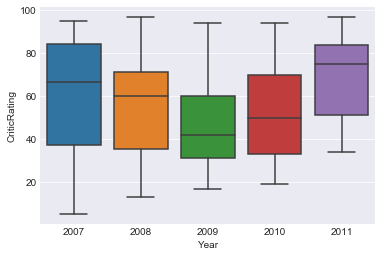

In [81]:
###--- why to use violinplots over boxplots?
w=sns.boxplot(data=movie[movie.Genre=='Drama'], x='Year', y='CriticRating')

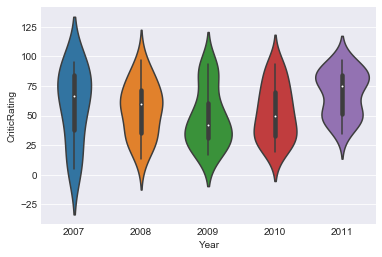

In [82]:
w=sns.violinplot(data=movie[movie.Genre=='Drama'], x='Year', y='CriticRating')

Checking the criticratings for the years 2008, 2011, we cannot observe much difference from boxplots. But from the violinplots, the density of observations is different and can be clearly identified.

Creating facet grids

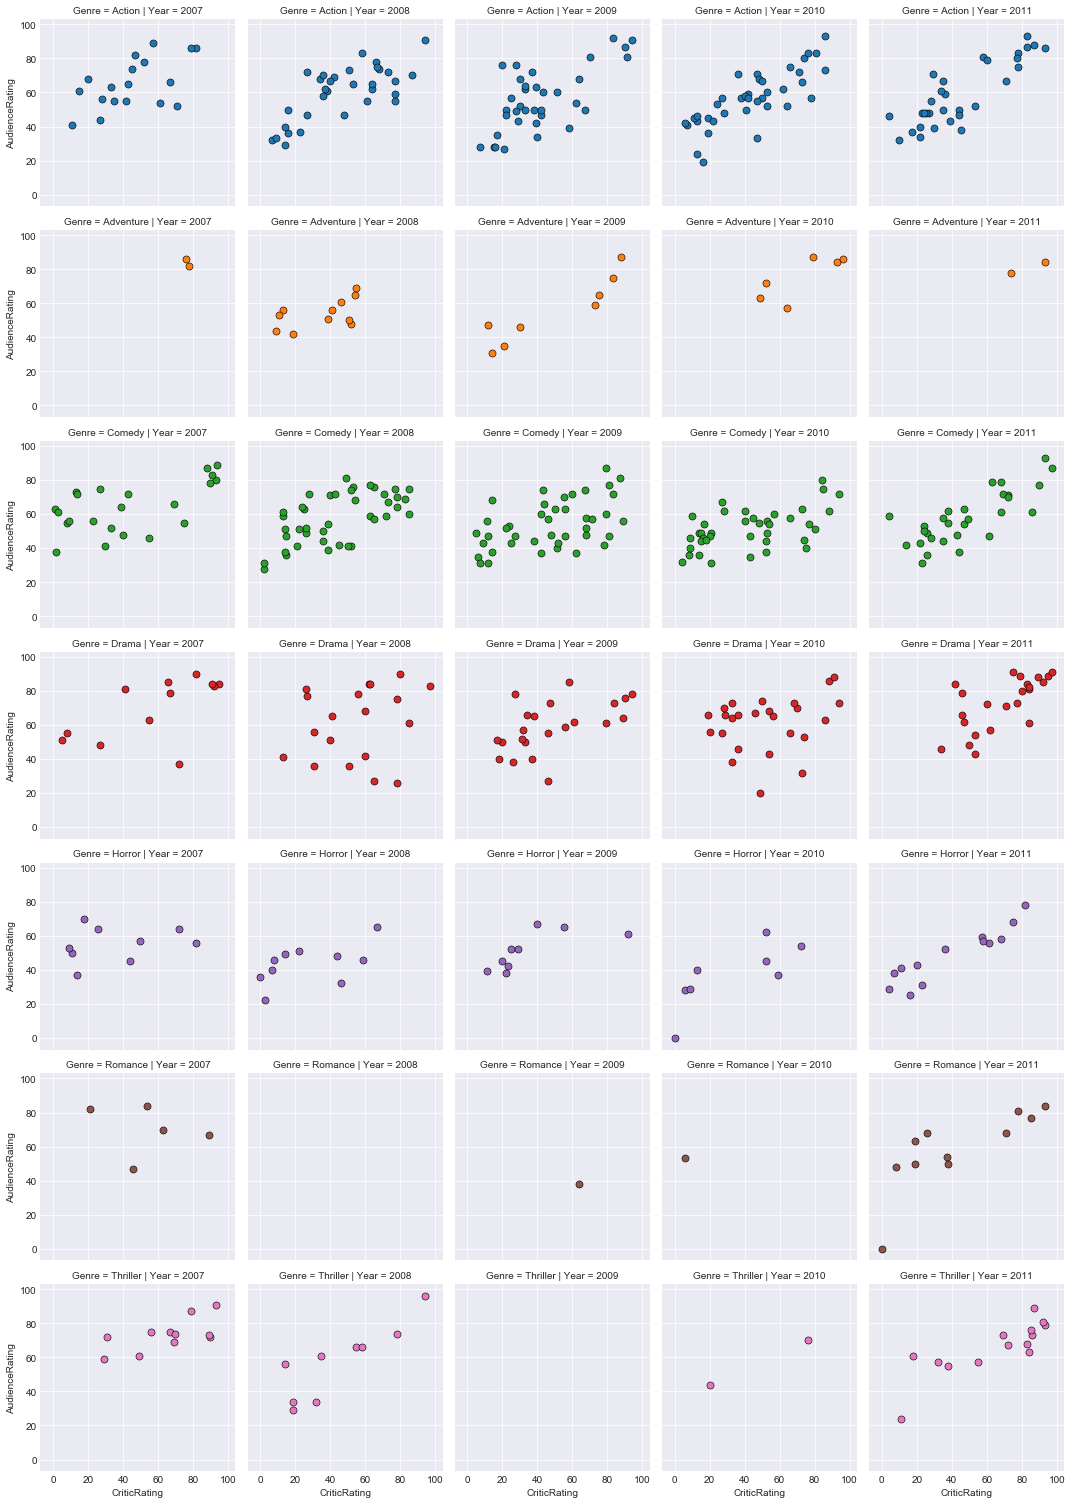

In [88]:
# Creating the facet grid with scatter plot
g=sns.FacetGrid(movie, row='Genre', col='Year', hue='Genre')
kws=dict(s=50, linewidth=0.6, edgecolor='Black')
g=g.map(plt.scatter, 'CriticRating', 'AudienceRating', **kws)

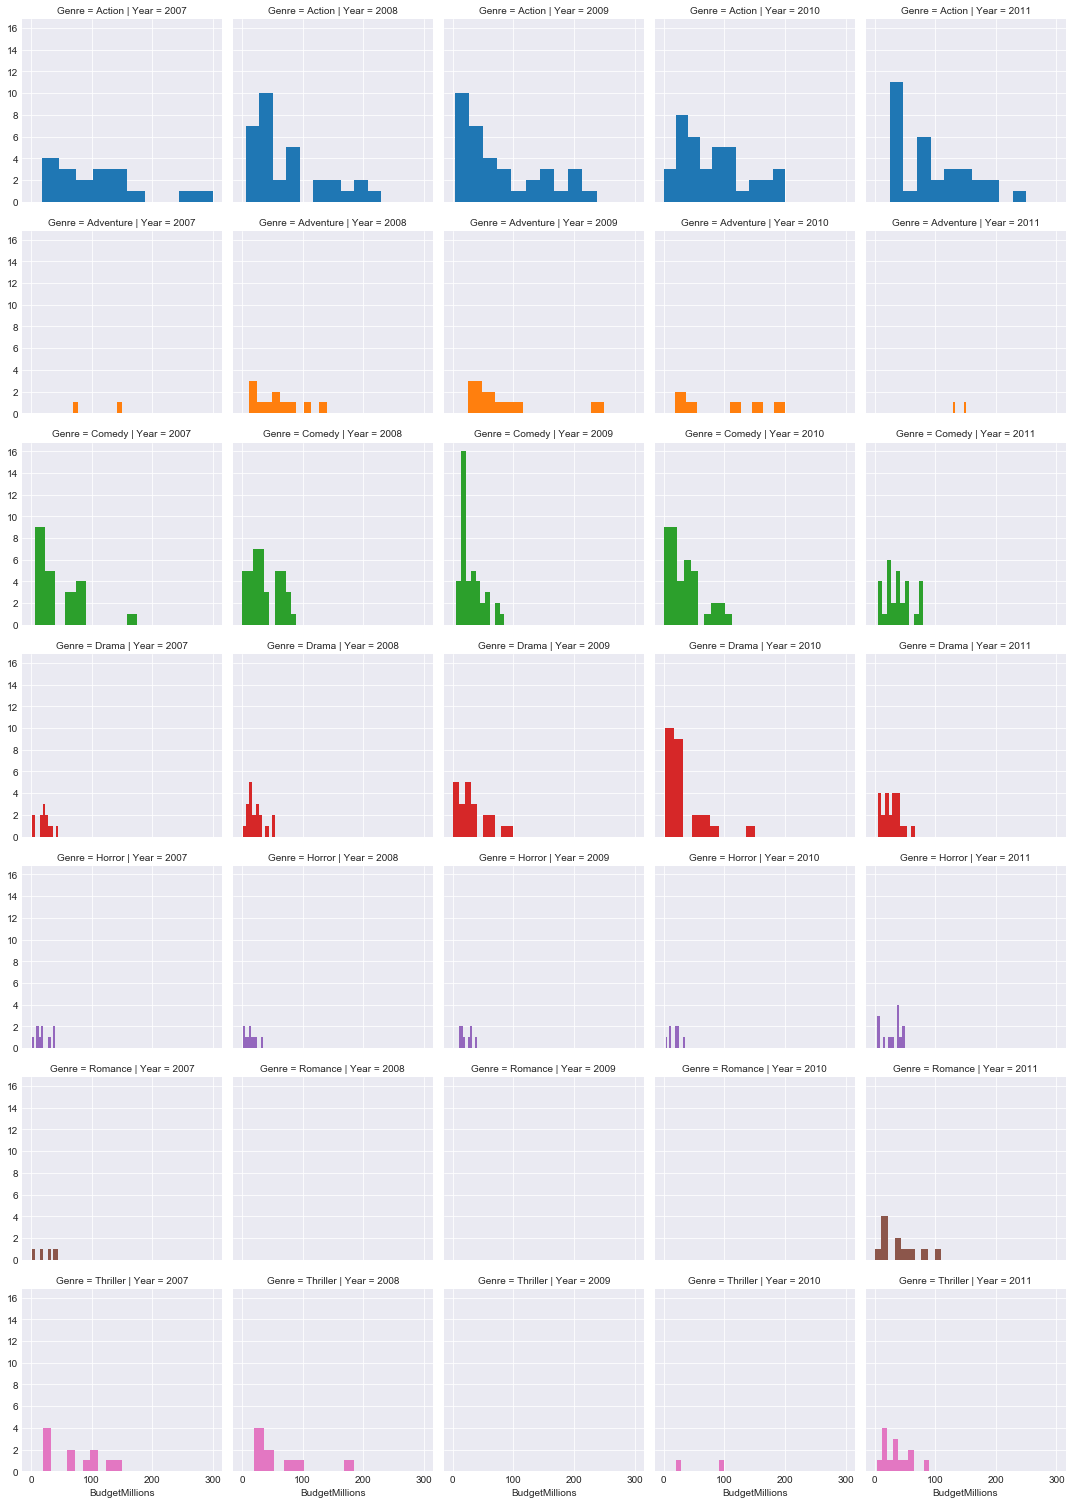

In [92]:
# Creating the facet grid with histogram
g=sns.FacetGrid(movie, row='Genre', col='Year', hue='Genre')
#kws=dict(s=50, linewidth=0.6, edgecolor='Black')
g=g.map(plt.hist, 'BudgetMillions')

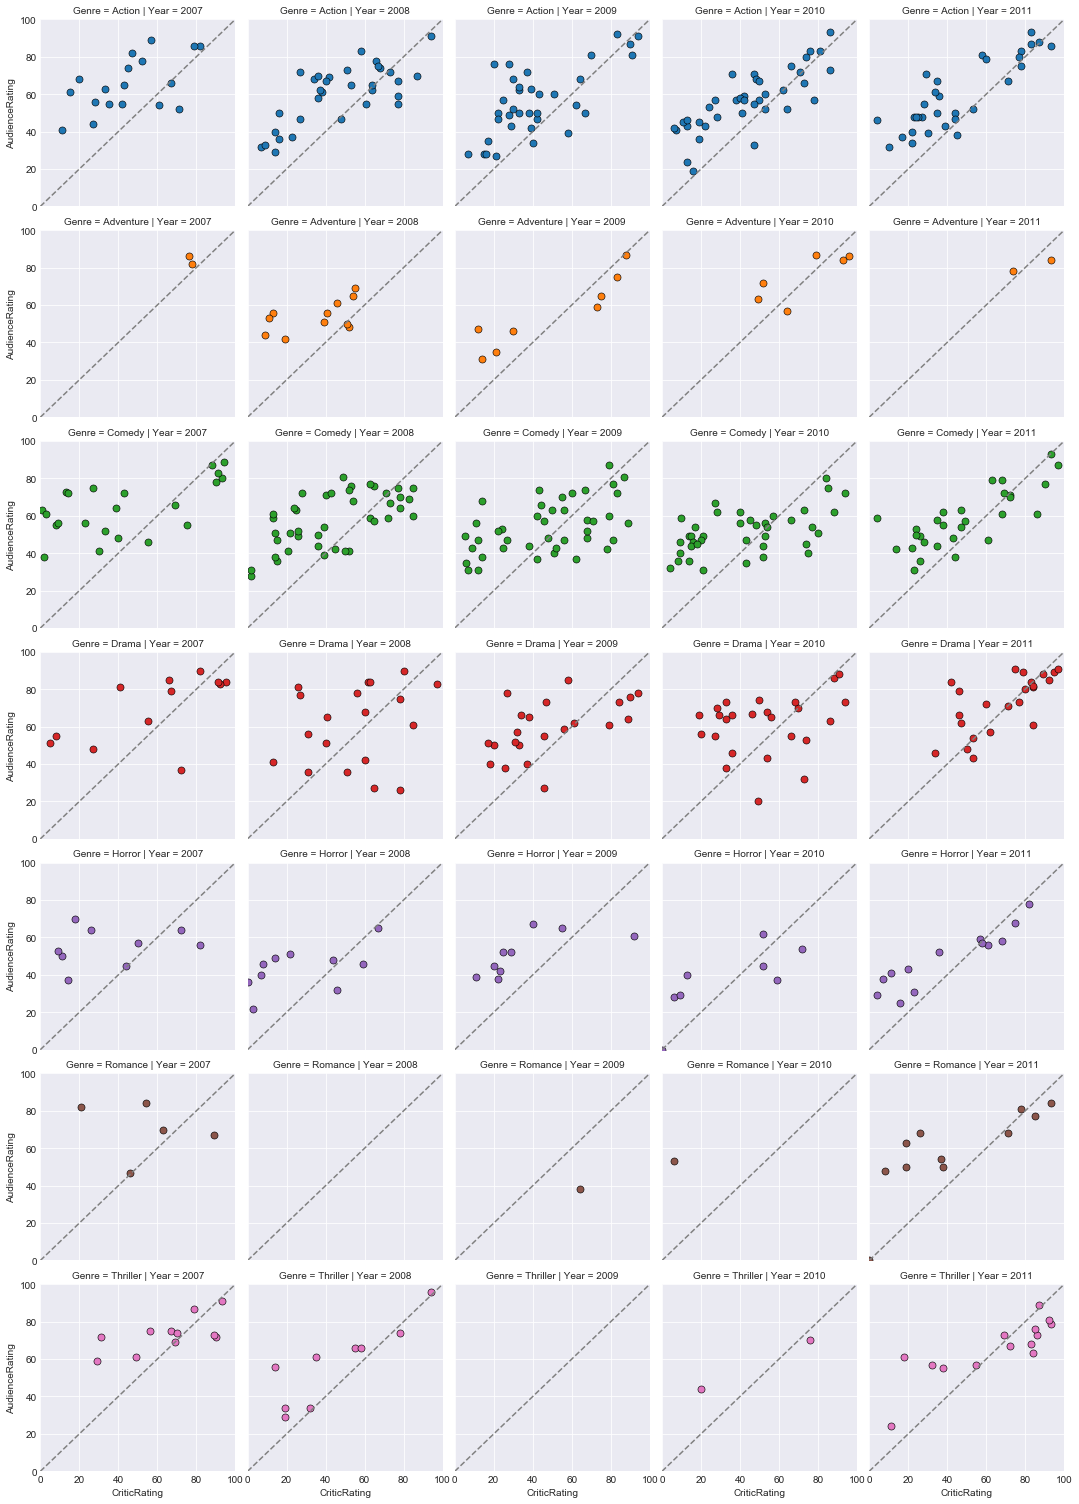

In [94]:
###--- Adding diagonals on the plot
g=sns.FacetGrid(movie, row='Genre', col='Year', hue='Genre')
kws=dict(s=50, linewidth=0.6, edgecolor='Black')
g=g.map(plt.scatter, 'CriticRating', 'AudienceRating', **kws)
g.set(xlim=(0,100),ylim=(0,100))
for ax in g.axes.flat:
    ax.plot((0,100),(0,100), c='gray', ls='--')

Creating dashboards in python
Things to remember:
Plots can be placed one over the other using subplots.
Only plots created using plt can be accessed using
eg: axes[1,1].hist(movie.CriticsRatings, bins=15)

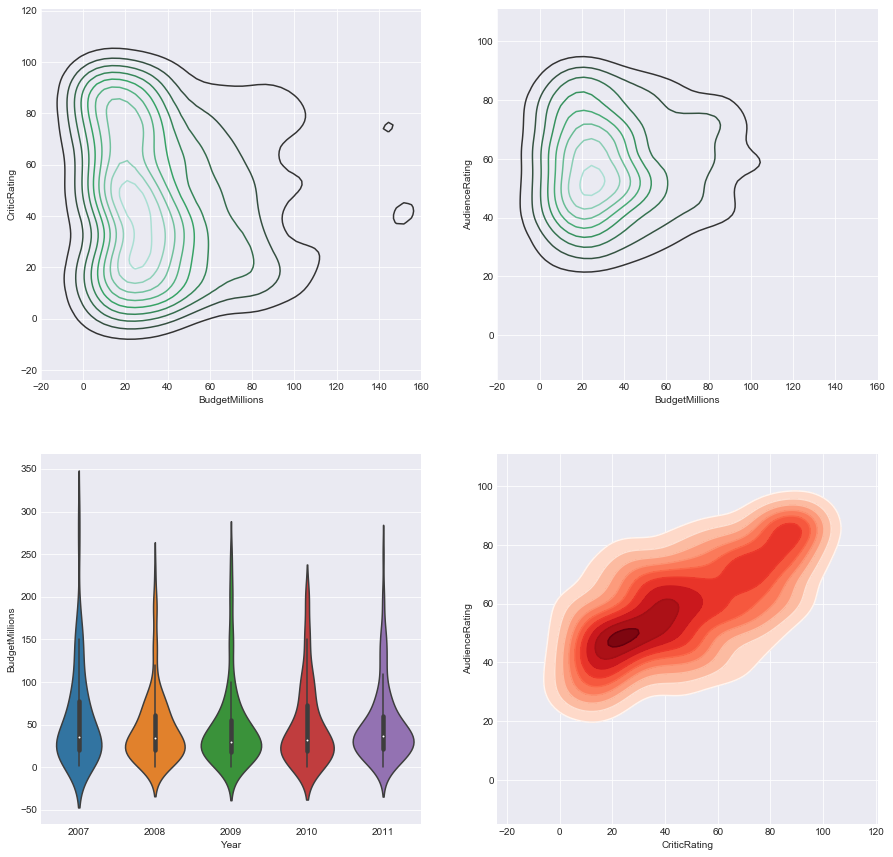

In [112]:
# To create dashboards in python, we must use subplot from plt
sns.set_style('darkgrid')
f, axes = plt.subplots(2,2, figsize=(15,15))
k1=sns.kdeplot( movie.BudgetMillions , movie.CriticRating , shade=False, ax=axes[0,0])
k2=sns.kdeplot( movie.BudgetMillions , movie.AudienceRating , shade=False, ax=axes[0,1])
w=sns.violinplot(data=movie, x='Year', y='BudgetMillions', ax=axes[1,0])
kde1=sns.kdeplot(movie.CriticRating, movie.AudienceRating, shade=True, shade_lowest=False,\
              cmap='Reds', axes=[1,1])
## Sharpening the kde plot - create another kde with just the outlines
kde1B=sns.kdeplot(movie.CriticRating, movie.AudienceRating, shade=False, cmap='Reds',axes=[1,1])
k1.set_xlim(-20,160)
k2.set_xlim(-20,160)
plt.show()  #-- used to get only the plots and not additional returned outputs

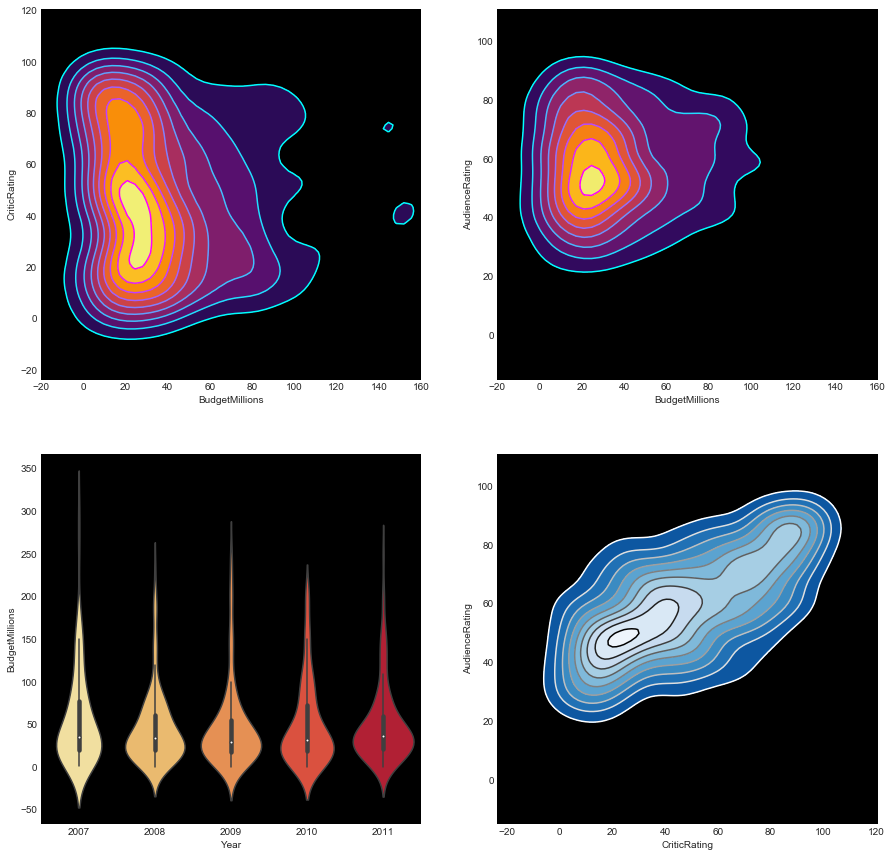

In [132]:
###---- Advanced visualization
# To create dashboards in python, we must use subplot from plt
sns.set_style('dark',{'axes.facecolor':'Black'})
f, axes = plt.subplots(2,2, figsize=(15,15))
#Plot[0,0]
k1=sns.kdeplot(movie.BudgetMillions , movie.CriticRating , shade=False, ax=axes[0,0], cmap='cool')
k1B=sns.kdeplot(movie.BudgetMillions , movie.CriticRating , \
                shade=True, shade_lowest=False, ax=axes[0,0], cmap='inferno')

#Plot[0,1]
k2=sns.kdeplot( movie.BudgetMillions , movie.AudienceRating , shade=False, ax=axes[0,1], \
               cmap='cool')
k2B=sns.kdeplot(movie.BudgetMillions , movie.AudienceRating , shade=True, shade_lowest=False,\
                cmap='inferno', ax=axes[0,1])

#Plot[1,0]
w=sns.violinplot(data=movie, x='Year', y='BudgetMillions', ax=axes[1,0], palette='YlOrRd')

# Plot[1,1]
kde1=sns.kdeplot(movie.CriticRating, movie.AudienceRating, shade=True, shade_lowest=False,\
              cmap='Blues_r', axes=[1,1])
kde1B=sns.kdeplot(movie.CriticRating, movie.AudienceRating, shade=False, cmap='gist_gray_r'\
                  ,axes=[1,1])


k1.set_xlim(-20,160)
k2.set_xlim(-20,160)
plt.show()  #-- used to get only the plots and not additional returned outputs

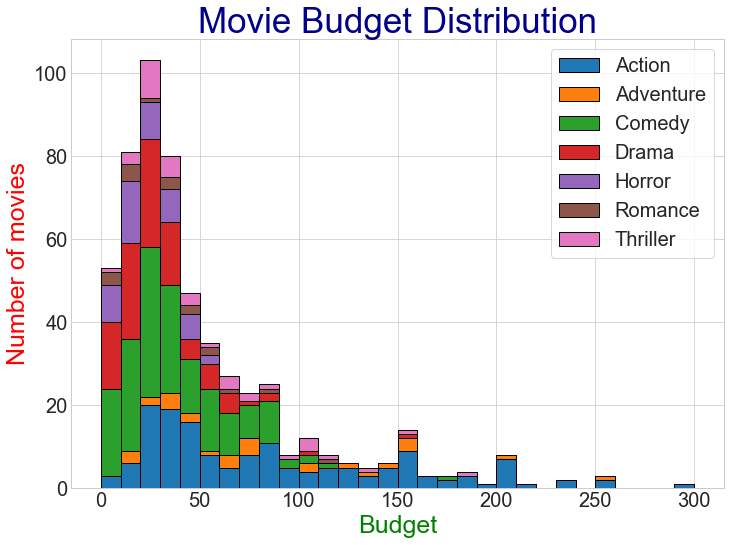

In [144]:
###---- Advanced visualization
list1=list()
mylabels=list()
for gen in movie.Genre.cat.categories:
    list1.append(movie[movie.Genre == gen].BudgetMillions)
    mylabels.append(gen)

fig, ax=plt.subplots()
fig.set_size_inches(11.7,8.27)
h = plt.hist(list1, bins=30, stacked=True, label=mylabels, rwidth=1, ec='black')
sns.set_style('whitegrid')
plt.title('Movie Budget Distribution', fontsize=35, color='darkblue')
plt.xlabel('Budget', fontsize=25, color='green')
plt.ylabel('Number of movies', fontsize=25, color='red')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=20, frameon=True, fancybox=True)
plt.show()